In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist_dataset=tf.keras.datasets.fashion_mnist

In [3]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist_dataset.load_data()

In [4]:
train_labels.shape

(60000,)

In [5]:
train_images.shape

(60000, 28, 28)

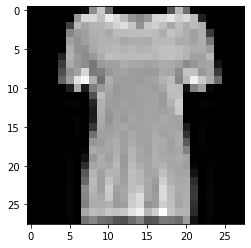

In [6]:
plt.imshow(train_images[10],cmap='gray')

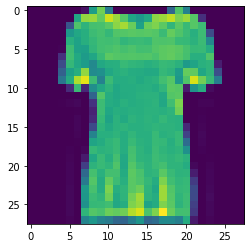

In [7]:
plt.imshow(train_images[10])

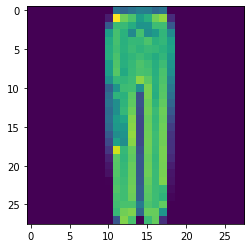

In [8]:
plt.imshow(train_images[1000])

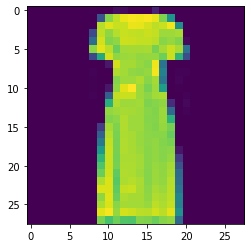

In [9]:
plt.imshow(train_images[50])

In [10]:
train_labels[10]

0

In [11]:
train_labels[1000]

1

In [12]:
train_labels[50]

3

In [13]:
train_labels.max() #10 classes of clothes

9

In [14]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(10))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [17]:
tf.one_hot(indices=train_images,depth=10)

<tf.Tensor: shape=(60000, 28, 28, 10), dtype=float32, numpy=
array([[[[1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         ...,
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.]],

        [[1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         ...,
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.]],

        [[1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         ...,
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         ...,
         [1., 0., 0., .

In [18]:
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics='accuracy')

* Use this crossentropy loss function when there are two or more label classes. We expect labels to be provided in a one_hot representation.
* If you want to provide labels as integers, please use SparseCategoricalCrossentropy loss. There should be # classes floating point values per feature.

In [19]:
history_= model.fit(train_images,train_labels,batch_size=64,epochs=12,validation_split=.2) 
print(train_images.shape)
print(train_labels.shape)
#valueerror: shapes (64, 1) and (64, 10) are incompatible 
#This error appeared before changing Dense(10) to Dense(1)

Epoch 1/12


ValueError: in user code:

    File "D:\python 3.10.6\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "D:\python 3.10.6\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\python 3.10.6\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "D:\python 3.10.6\lib\site-packages\keras\engine\training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "D:\python 3.10.6\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "D:\python 3.10.6\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "D:\python 3.10.6\lib\site-packages\keras\losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "D:\python 3.10.6\lib\site-packages\keras\losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "D:\python 3.10.6\lib\site-packages\keras\losses.py", line 1787, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "D:\python 3.10.6\lib\site-packages\keras\backend.py", line 5119, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (64, 1) and (64, 10) are incompatible


In [20]:
history_.history

NameError: name 'history_' is not defined

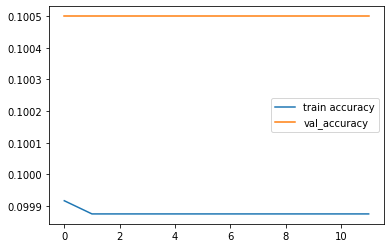

In [74]:
plt.plot(history_.history['accuracy'],label='train accuracy')
plt.plot(history_.history['val_accuracy'],label='val_accuracy')
plt.legend()

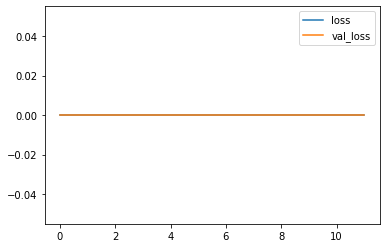

In [75]:
plt.plot(history_.history['loss'],label='loss ')
plt.plot(history_.history['val_loss'],label='val_loss')
plt.legend()

In [40]:
pred=model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


In [41]:
pred.shape

(10000, 1)

In [42]:
test_images.shape

(10000, 28, 28)

In [43]:
test_labels[0]

9

In [44]:
pred[0]

array([2.4114034e+08], dtype=float32)

In [45]:
np.argmax(pred[0])

0

In [46]:
pred[10]

array([4.751454e+08], dtype=float32)

In [47]:
np.argmax(pred[10])

0

In [48]:
pred[1000]

array([5.93248e+08], dtype=float32)

In [49]:
np.argmax(pred[10])

0

In [50]:
pred[50]

array([7.638463e+08], dtype=float32)

In [51]:
np.argmax(pred[50])

0

In [52]:
pred_argmax=[]
for p in pred:
  pred_argmax.append(np.argmax(p))

In [53]:
pred_argmax[0]

0

In [54]:
for p in pred:
    print(p)

[2.4114034e+08]
[7.227072e+08]
[3.6971958e+08]
[2.5365907e+08]
[4.4829517e+08]
[3.598065e+08]
[2.0142488e+08]
[3.4249446e+08]
[73868232.]
[1.8328059e+08]
[4.751454e+08]
[1.8532693e+08]
[2.1259419e+08]
[3.125513e+08]
[7.75035e+08]
[2.7291158e+08]
[3.8099072e+08]
[5.407383e+08]
[4.5332045e+08]
[5.96895e+08]
[7.6050176e+08]
[2.4295963e+08]
[3.1783034e+08]
[2.9476326e+08]
[2.6740315e+08]
[2.5743819e+08]
[6.3612915e+08]
[5.6553024e+08]
[3.702764e+08]
[4.95105e+08]
[6.542735e+08]
[2.7359094e+08]
[1.8370251e+08]
[4.7653824e+08]
[4.0007053e+08]
[2.5333011e+08]
[2.3212648e+08]
[78115224.]
[2.9657034e+08]
[4.2529658e+08]
[6.049089e+08]
[3.655463e+08]
[5.038689e+08]
[3.7051514e+08]
[6.7825594e+08]
[1.7897688e+08]
[7.190291e+08]
[3.6077805e+08]
[3.1285203e+08]
[5.8187405e+08]
[7.638463e+08]
[2.6850784e+08]
[89710272.]
[9.0708954e+08]
[3.6078208e+08]
[7.0744723e+08]
[6.0197075e+08]
[5.0590106e+08]
[5.018416e+08]
[2.308073e+08]
[2.0926293e+08]
[2.8532525e+08]
[5.1685114e+08]
[1.3891123e+08]
[3.86197

[2.285716e+08]
[3.6953277e+08]
[5.492579e+08]
[3.4788493e+08]
[6.029144e+08]
[2.4041627e+08]
[3.8410144e+08]
[3.669328e+08]
[6.783332e+08]
[1.0437498e+08]
[4.5750413e+08]
[98616760.]
[3.1828493e+08]
[1.658924e+08]
[3.3973725e+08]
[5.469985e+08]
[3.0760832e+08]
[5.457961e+08]
[2.688438e+08]
[6.829179e+08]
[4.653719e+08]
[1.866701e+08]
[4.4666013e+08]
[1.7535098e+08]
[2.5228542e+08]
[2.0172971e+08]
[3.9125536e+08]
[4.2022016e+08]
[2.781611e+08]
[4.3594243e+08]
[5.506182e+08]
[3.953096e+08]
[5.592158e+08]
[7.330405e+08]
[4.2452544e+08]
[2.129796e+08]
[5.192702e+08]
[1.5672197e+08]
[6.893838e+08]
[2.3049544e+08]
[2.5718162e+08]
[2.786044e+08]
[5.1401622e+08]
[2.380652e+08]
[1.01763704e+08]
[7.4402406e+08]
[6.0795635e+08]
[4.6474544e+08]
[1.949124e+08]
[4.839332e+08]
[4.2674253e+08]
[4.3428755e+08]
[2.357763e+08]
[2.1140173e+08]
[2.9625146e+08]
[4.7636806e+08]
[3.2925107e+08]
[2.3486334e+08]
[6.215436e+08]
[6.970042e+08]
[7.2122675e+08]
[1.5962571e+08]
[1.8398229e+08]
[5.675128e+08]
[2.9226

[6.80568e+08]
[2.5353531e+08]
[5.182416e+08]
[3.125945e+08]
[72557864.]
[3.968772e+08]
[2.924109e+08]
[3.9656822e+08]
[2.9126605e+08]
[4.26862e+08]
[1.9896782e+08]
[2.3106811e+08]
[5.534815e+08]
[91478072.]
[3.898659e+08]
[5.3622304e+08]
[3.1829357e+08]
[4.6140438e+08]
[2.4751171e+08]
[1.8779914e+08]
[5.43613e+08]
[6.197118e+08]
[5.954853e+08]
[4.0350762e+08]
[3.6812218e+08]
[74701160.]
[4.5016045e+08]
[3.6339638e+08]
[6.1499584e+08]
[1.6495893e+08]
[4.2786304e+08]
[3.1991338e+08]
[3.6986797e+08]
[5.5886515e+08]
[3.7448e+08]
[3.7712845e+08]
[5.0743443e+08]
[3.521853e+08]
[1.9419533e+08]
[2.928585e+08]
[2.254339e+08]
[6.7973146e+08]
[6.7708666e+08]
[3.0688326e+08]
[1.7284645e+08]
[3.2527424e+08]
[6.512766e+08]
[3.3436416e+08]
[2.3079317e+08]
[4.3462662e+08]
[4.911251e+08]
[6.22028e+08]
[6.6360256e+08]
[1.9628208e+08]
[2.9735507e+08]
[5.568974e+08]
[5.178541e+08]
[8.019691e+08]
[3.5665965e+08]
[5.798395e+08]
[1.5895048e+08]
[3.8538138e+08]
[6.9853286e+08]
[2.3820877e+08]
[4.8880237e+08]


[1.7256773e+08]
[7.6775846e+08]
[5.692434e+08]
[5.3346774e+08]
[4.9759846e+08]
[4.8073594e+08]
[3.3749997e+08]
[1.668563e+08]
[2.6529952e+08]
[3.649157e+08]
[8.5010144e+08]
[3.5768902e+08]
[3.6478403e+08]
[4.206067e+08]
[6.75717e+08]
[5.067168e+08]
[94754376.]
[1.0440161e+08]
[4.2501862e+08]
[4.7575923e+08]
[6.2072723e+08]
[3.8354854e+08]
[5.573965e+08]
[4.3912048e+08]
[5.3378762e+08]
[3.5106957e+08]
[2.4339979e+08]
[3.4169187e+08]
[5.371044e+08]
[5.1316813e+08]
[4.0381373e+08]
[2.7193952e+08]
[6.2394624e+08]
[5.0073485e+08]
[3.6491408e+08]
[3.5845395e+08]
[3.1096512e+08]
[2.0471794e+08]
[3.2220666e+08]
[5.812956e+08]
[4.2738214e+08]
[4.1976352e+08]
[6.952982e+08]
[2.1887723e+08]
[7.285006e+08]
[3.3211366e+08]
[3.6680995e+08]
[2.863344e+08]
[3.421595e+08]
[4.310772e+08]
[2.4484754e+08]
[2.6815656e+08]
[3.425211e+08]
[3.0775834e+08]
[2.4732917e+08]
[2.2785966e+08]
[6.4771603e+08]
[5.9584416e+08]
[3.2769808e+08]
[5.1366246e+08]
[3.0138336e+08]
[6.674958e+08]
[5.931543e+08]
[1.9119301e+08

In [55]:
for p in pred_argmax:
    print(p)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [76]:
from sklearn.metrics import accuracy_score

In [77]:
accuracy_score(test_labels,pred_argmax)

0.1

In [58]:
np.argmax(model.predict(np.expand_dims(test_images[100],0)))

1/1 [==============================] - 0s 34ms/step


0

In [59]:
test_images[100].shape

(28, 28)

In [60]:
tf.expand_dims(test_images[100],0).shape

TensorShape([1, 28, 28])

In [61]:
np.expand_dims(test_images[100],0).shape

(1, 28, 28)

In [62]:
test_labels[100]

3

In [63]:
pred[100]

array([2.6317878e+08], dtype=float32)

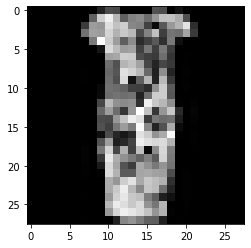

In [64]:
plt.imshow(test_images[100],cmap='gray')

In [78]:
cce = tf.keras.losses.CategoricalCrossentropy(reduction=tf.keras.losses.Reduction.NONE)

In [79]:
pred=pred.reshape((10000,))
cce(test_labels, pred).numpy()

420242.8